Performing time-series analysis on Reliance data over the last 12 years

<h4> Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reliance_df = pd.read_csv('RelianceData.csv')

In [3]:
reliance_df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,2-1-2009,313.54,319.47,350.21,297.52,331.25M,-4.35%
1,3-1-2009,377.61,304.29,392.13,276.21,453.20M,20.43%
2,4-1-2009,447.32,377.17,455.68,370.82,360.87M,18.46%
3,5-1-2009,562.64,458.4,627.8,454.69,362.93M,25.78%
4,6-1-2009,501.1,577.03,589.17,470.54,392.31M,-10.94%
5,7-1-2009,484.26,502.71,540.63,425.24,395.06M,-3.36%
6,8-1-2009,496.57,487.6,526.26,462.52,273.31M,2.54%
7,9-1-2009,545.24,501.45,554.72,476.31,331.44M,9.80%
8,10-1-2009,478.25,544.81,565.96,475.99,279.99M,-12.29%
9,11-1-2009,526.76,475.51,551.25,446.33,289.15M,10.14%


In [4]:
reliance_df = reliance_df.iloc[:,:2]

In [5]:
reliance_df['Price'] = reliance_df['Price'].str.replace(",","")

In [6]:
reliance_df['Price'] = reliance_df['Price'].astype(float) 

In [7]:
reliance_df.dtypes

Date      object
Price    float64
dtype: object

In [8]:
reliance_df["Date"] = pd.to_datetime(reliance_df['Date'],infer_datetime_format = True)

In [9]:
reliance_df["Date"]

0     2009-02-01
1     2009-03-01
2     2009-04-01
3     2009-05-01
4     2009-06-01
         ...    
145   2021-03-01
146   2021-04-01
147   2021-05-01
148   2021-06-01
149   2021-07-01
Name: Date, Length: 150, dtype: datetime64[ns]

In [10]:
reliance_df = reliance_df.set_index(['Date'])

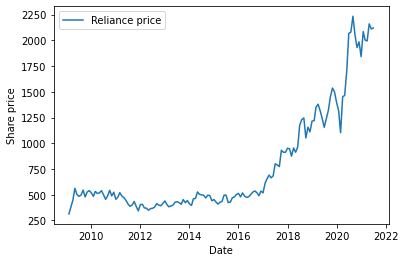

In [11]:
plt.xlabel('Date')
plt.ylabel('Share price')
plt.plot(reliance_df,label='Reliance price')
plt.legend(loc='best')

<h3> Check for stationarity of data</h3>
<ul>
    <li>Checking if the mean is constant</li>
    <li>Checking if the variance is constant</li>
    <li>Checking if auto covariance is independent of time</li>
</ul>
<p> There are three tests which are used to detect the stationarity<br>
    1. Rolling Stats<br>
    2. Augmented Dickey-Fuller Test<br>
    3. KPSS Test</p>

In [12]:
def rolling_stats_test(reliance_df_target):
    rolling_mean = reliance_df_target.rolling(window=12).mean()
    rolling_std_dev = reliance_df_target.rolling(window=12).std()
    plt.xlabel('Year')
    plt.ylabel('Share Price')
    plt.plot(reliance_df_target,label='Actual Data')
    plt.plot(rolling_mean,color = 'red',label='Mean')
    plt.plot(rolling_std_dev,color = 'black',label='Std Dev')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

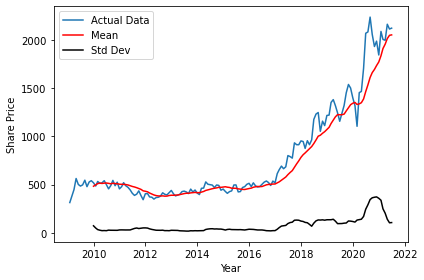

In [13]:
rolling_stats_test(reliance_df)

In [19]:
from statsmodels.tsa.stattools import adfuller,kpss

In [15]:
def ADF_test(reliance_df_target):
    adf_df = adfuller(reliance_df_target,autolag='AIC')
    adf_op = pd.Series(adf_df[0:4],index=['Test Statistic','P-value','#Lags-used','# Observations'])
    for key,value in adf_df[4].items():
        adf_op[f'Critical value {key}'] = value
    print(adf_op)

In [16]:
ADF_test(reliance_df['Price'])

Test Statistic          3.143468
P-value                 1.000000
#Lags-used             12.000000
# Observations        137.000000
Critical value 1%      -3.479007
Critical value 5%      -2.882878
Critical value 10%     -2.578149
dtype: float64


In [17]:
def KPSS_test(reliance_df_target):
    kpss_df = kpss(reliance_df_target,regression='c',nlags="auto")
    kpss_op = pd.Series(kpss_df[0:3],index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpss_df[3].items():
        kpss_op[f'Critical Value {key}'] = value
    print (kpss_op)

In [20]:
KPSS_test(reliance_df['Price'])

Test Statistic         1.29758
p-value                0.01000
Lags Used              8.00000
Critical Value 10%     0.34700
Critical Value 5%      0.46300
Critical Value 2.5%    0.57400
Critical Value 1%      0.73900
dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


The data is non-stationary due to two reasons:
<ol>
    <li> Null hypothesis for ADF test: <b>Rejected, making the timeseries non-stationary.</b><br></li>
    <li> Null hypothesis for KPSS test:  <b>Accepted, making the timeseries non-stationary.</b></li>
    <li>The critical values are all smaller than the test statistic value for ADF test.</li>
</ol>
<p>In order to make the data stationary, the data has to be transformed.<br>
    There are various transformation techniques which can be performed,namely:<br>
    <b>1. Log transformation<br>
    2. Square Root transformation<br>
    3. Cube Root transformation</b><br>
    Since there is no correct transformation, the best method has to be adjudged experimentally.
</p>
    

#### Performing log transformation

In [21]:
reliance_df_log = np.log1p(reliance_df)

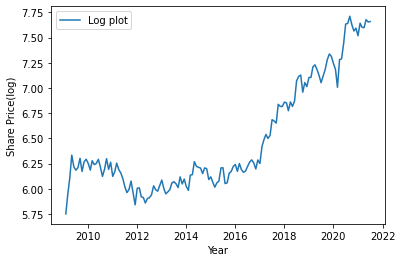

In [22]:
plt.xlabel('Year')
plt.ylabel('Share Price(log)')
plt.plot(reliance_df_log,label='Log plot')
plt.legend(loc = 'best')

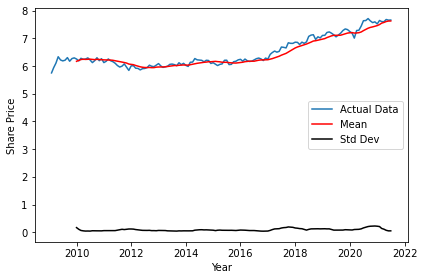

In [24]:
rolling_stats_test(reliance_df_log)

#### Since the standard deviation appears to be constant, let us plot the same graph with the log data and moving average alone.

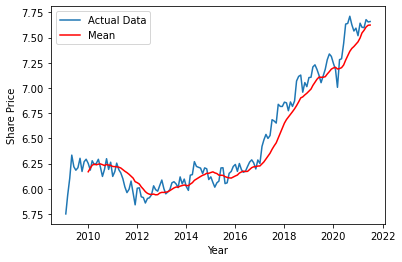

In [25]:
rolling_mean = reliance_df_log.rolling(window=12).mean()
plt.xlabel('Year')
plt.ylabel('Share Price')
plt.plot(reliance_df_log,label='Actual Data')
plt.plot(rolling_mean,color = 'red',label='Mean')
plt.legend(loc='best')

#### The mean appears to be very similar to the mean of the original data. Let us take the moving average differencing of log values and check the performance again.

In [26]:
reliance_df_log_avg_diff = reliance_df_log - rolling_mean
reliance_df_log_avg_diff.dropna(inplace=True)

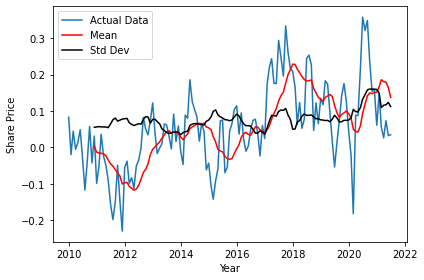

In [27]:
rolling_stats_test(reliance_df_log_avg_diff)

In [28]:
ADF_test(reliance_df_log_avg_diff)

Test Statistic         -4.071584
P-value                 0.001079
#Lags-used              0.000000
# Observations        138.000000
Critical value 1%      -3.478648
Critical value 5%      -2.882722
Critical value 10%     -2.578065
dtype: float64


In [29]:
KPSS_test(reliance_df_log_avg_diff)

Test Statistic         1.059127
p-value                0.010000
Lags Used              6.000000
Critical Value 10%     0.347000
Critical Value 5%      0.463000
Critical Value 2.5%    0.574000
Critical Value 1%      0.739000
dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


#### Here, according to ADF test, the data is stationary as p-value is < 0.05 but is non-stationary according to KPSS test. Therefore, differencing is required and the data has to be checked again. 

In [30]:
reliance_df_log_diff = reliance_df_log - reliance_df_log.shift(1)
reliance_df_log_diff.dropna(inplace=True)

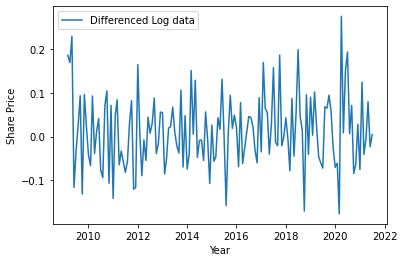

In [31]:
plt.xlabel('Year')
plt.ylabel('Share Price')
plt.plot(reliance_df_log_diff,label='Differenced Log data')
plt.legend(loc='best')

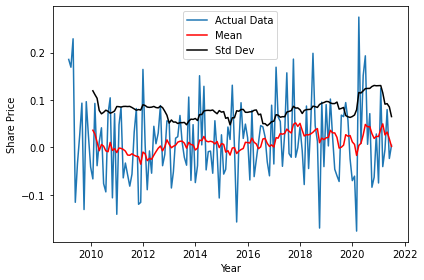

In [32]:
rolling_stats_test(reliance_df_log_diff)

#### From the graph it can be seen that the data is closer to being stationary. The mean and standad deviation appear to be constant. Proceeding to ADF and KPSS tests.

In [33]:
ADF_test(reliance_df_log_diff)

Test Statistic       -7.929593e+00
P-value               3.542403e-12
#Lags-used            3.000000e+00
# Observations        1.450000e+02
Critical value 1%    -3.476273e+00
Critical value 5%    -2.881688e+00
Critical value 10%   -2.577513e+00
dtype: float64


In [34]:
KPSS_test(reliance_df_log_diff)

Test Statistic         0.197318
p-value                0.100000
Lags Used              4.000000
Critical Value 10%     0.347000
Critical Value 5%      0.463000
Critical Value 2.5%    0.574000
Critical Value 1%      0.739000
dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


#### From the ADF and KPSS tests, it can be concluded that the data is stationary after differencing the data. Hence, there is no need to proceed with the other transformations. However, other methods such as exponential decay can be explored to find a better model.

In [35]:
exp_decay_avg = reliance_df_log.ewm(halflife=12,min_periods=0,adjust=True).mean()

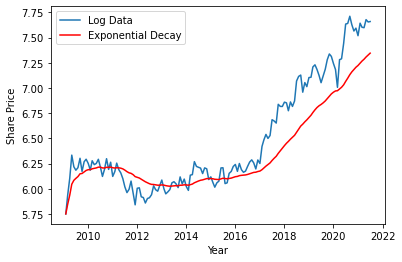

In [36]:
plt.xlabel('Year')
plt.ylabel('Share Price')
plt.plot(reliance_df_log,label='Log Data')
plt.plot(exp_decay_avg,label='Exponential Decay',color='red')
plt.legend(loc='best')

#### Repeating the same procedure again:

In [37]:
reliance_df_log_exp_avg = reliance_df_log - exp_decay_avg
reliance_df_log_exp_avg.dropna(inplace=True)

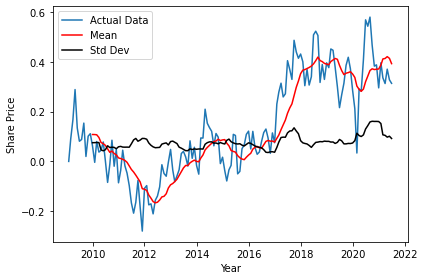

In [38]:
rolling_stats_test(reliance_df_log_exp_avg)

In [39]:
ADF_test(reliance_df_log_exp_avg)

Test Statistic         -1.185158
P-value                 0.679948
#Lags-used              4.000000
# Observations        145.000000
Critical value 1%      -3.476273
Critical value 5%      -2.881688
Critical value 10%     -2.577513
dtype: float64


In [40]:
KPSS_test(reliance_df_log_exp_avg)

Test Statistic         1.284613
p-value                0.010000
Lags Used              8.000000
Critical Value 10%     0.347000
Critical Value 5%      0.463000
Critical Value 2.5%    0.574000
Critical Value 1%      0.739000
dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


#### It can be seen that the data is non-stationary and looks worse than the log difference. Hence, there is no need to proceed with detrending or differencing.

### Plotting the trend, seasonal and residual data. 

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
decomposition = seasonal_decompose(reliance_df_log)

In [45]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

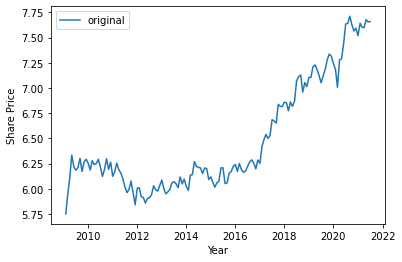

In [47]:
plt.xlabel('Year')
plt.ylabel('Share Price')
plt.plot(reliance_df_log,label='original')
plt.legend(loc='best')

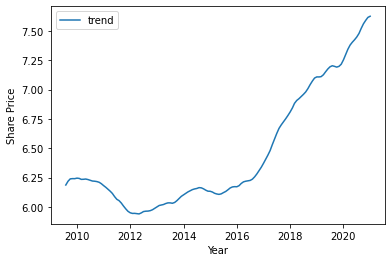

In [48]:
plt.xlabel('Year')
plt.ylabel('Share Price')
plt.plot(trend,label='trend')
plt.legend(loc='best')

#### The trend indicates that there was a marginal dip in Share price from 2010 to 2012, but there has been a steady increase barring occasional dips from 2012 to 2021.

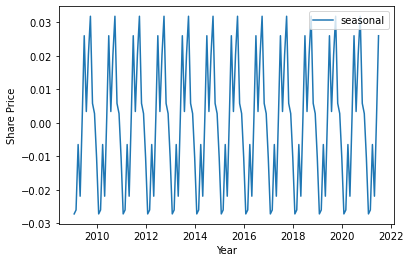

In [49]:
plt.xlabel('Year')
plt.ylabel('Share Price')
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

#### Here, the pattern visible appears to be cyclic every year. It is neither an additive nor multiplicative change.

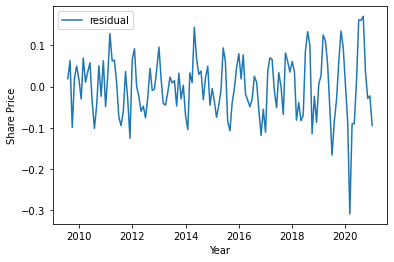

In [50]:
plt.xlabel('Year')
plt.ylabel('Share Price')
plt.plot(residual,label='residual')
plt.legend(loc='best')

In [51]:
decomposed_data = residual
decomposed_data.dropna(inplace=True)

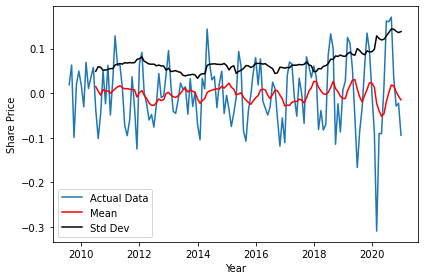

In [52]:
rolling_stats_test(decomposed_data)

In [53]:
ADF_test(decomposed_data)

Test Statistic       -9.327629e+00
P-value               9.515834e-16
#Lags-used            3.000000e+00
# Observations        1.340000e+02
Critical value 1%    -3.480119e+00
Critical value 5%    -2.883362e+00
Critical value 10%   -2.578407e+00
dtype: float64


<h4> Building ARIMA model</h4>
<p> Here: AR -> Auto regressor<br>
          MA -> Moving Average<br>
    <b>p -> AR<br>
    d -> Order of differentiation<br>
    q -> MA</b><br>

<p>The values of p and q can be found using acf and pacf graph<br>
<b>acf -> Auto Correlation Function<br>
    pacf -> Partial Auto Correlation Function</b>

In [54]:
from statsmodels.tsa.stattools import acf,pacf

In [55]:
lag_acf = acf(reliance_df_log_diff,nlags=20)
lag_pacf = pacf(reliance_df_log_diff,nlags=20,method='ols')

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


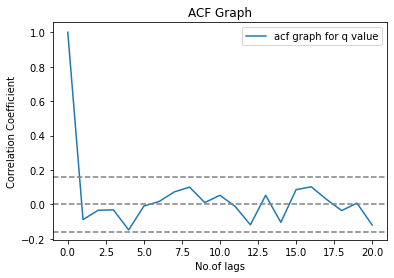

In [56]:
plt.xlabel('No.of lags')
plt.ylabel('Correlation Coefficient')
plt.plot(lag_acf,label = 'acf graph for q value')
plt.axhline(y = 0,linestyle = '--',color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(reliance_df_log_diff)),linestyle = "--",color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(reliance_df_log_diff)),linestyle = "--",color = 'gray')
plt.title('ACF Graph')
plt.legend(loc = 'best')

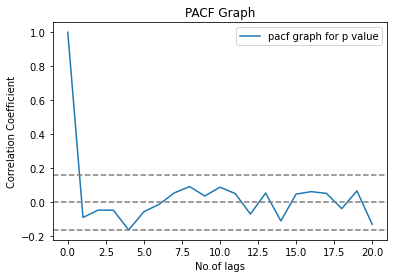

In [57]:
plt.xlabel('No.of lags')
plt.ylabel('Correlation Coefficient')
plt.plot(lag_pacf,label = 'pacf graph for p value')
plt.axhline(y = 0,linestyle = '--',color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(reliance_df_log_diff)),linestyle = "--",color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(reliance_df_log_diff)),linestyle = "--",color = 'gray')
plt.title('PACF Graph')
plt.legend(loc = 'best')

<p> p and q values can be decided by taking the x-intercept of the point where the graph first intersects the line passing through y = 0.<br>
    Here: p = q ~= 0.7</p>

#### Building the ARIMA model after combining the AR and MA models with p,q,d values = 1

In [58]:
from statsmodels.tsa.arima_model import ARIMA

In [113]:
model = ARIMA(reliance_df_log,order = (0,1,0))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [114]:
results_ARIMA = model.fit()

Text(0.5, 1.0, 'RSS VALUE: 1.0175072475210232')

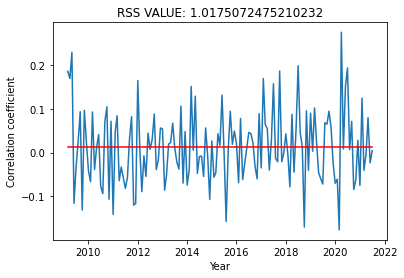

In [115]:
plt.xlabel('Year')
plt.ylabel('Correlation coefficient')
plt.plot(reliance_df_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title(f"RSS VALUE: {sum((results_ARIMA.fittedvalues - reliance_df_log_diff['Price'])**2)}")

#### Before we forecast data to predict new values, the data has to scaled up to the original range. Therefore, a reverse transformation is performed in order to convert the log data to the original data.

In [116]:
predicted_ARIMA_values = pd.Series(results_ARIMA.fittedvalues,copy=True)

In [117]:
predicted_ARIMA_values

Date
2009-03-01    0.012809
2009-04-01    0.012809
2009-05-01    0.012809
2009-06-01    0.012809
2009-07-01    0.012809
                ...   
2021-03-01    0.012809
2021-04-01    0.012809
2021-05-01    0.012809
2021-06-01    0.012809
2021-07-01    0.012809
Length: 149, dtype: float64

In [118]:
predicted_ARIMA_cum_sum = predicted_ARIMA_values.cumsum()

In [119]:
predicted_ARIMA_cum_sum.head()

Date
2009-03-01    0.012809
2009-04-01    0.025618
2009-05-01    0.038427
2009-06-01    0.051236
2009-07-01    0.064045
dtype: float64

In [120]:
predicted_ARIMA_log = pd.Series(reliance_df_log['Price'].iloc[0],index = reliance_df_log.index)
predicted_ARIMA_log = predicted_ARIMA_log.add(predicted_ARIMA_cum_sum,fill_value=0)

In [121]:
predicted_ARIMA_log.head()

Date
2009-02-01    5.751111
2009-03-01    5.763920
2009-04-01    5.776729
2009-05-01    5.789538
2009-06-01    5.802347
dtype: float64

In [122]:
pred_ARIMA_original = np.exp(predicted_ARIMA_log)

In [123]:
pred_ARIMA_original.tail()

Date
2021-03-01    2015.065710
2021-04-01    2041.042572
2021-05-01    2067.354311
2021-06-01    2094.005242
2021-07-01    2120.999739
dtype: float64

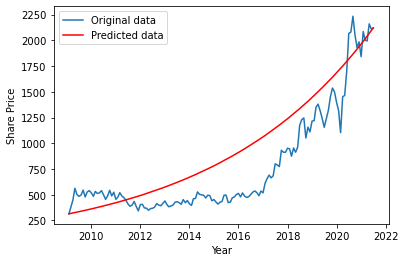

In [124]:
plt.xlabel('Year')
plt.ylabel('Share Price')
plt.plot(reliance_df,label='Original data')
plt.plot(pred_ARIMA_original,label='Predicted data',color='red')
plt.legend(loc='best')

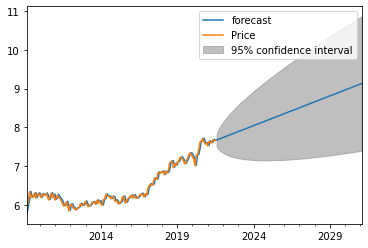

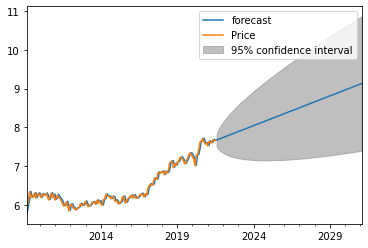

In [125]:
results_ARIMA.plot_predict(1,264) 

In [126]:
x = results_ARIMA.forecast(steps=120)

In [127]:
print(np.exp(x[0]))

[2148.34249518 2176.03747128 2204.08947226 2232.50310063 2261.28301824
 2290.43394706 2319.96066991 2349.86803126 2380.16093806 2410.84436049
 2441.92333282 2473.4029542  2505.28838954 2537.58487031 2570.29769543
 2603.43223213 2636.99391683 2670.98825604 2705.42082724 2740.29727982
 2775.623336   2811.40479177 2847.64751783 2884.35746056 2921.540643
 2959.20316584 2997.35120841 3035.99102971 3075.1289694  3114.7714489
 3154.9249724  3195.59612791 3236.79158841 3278.51811288 3320.78254744
 3363.59182645 3406.9529737  3450.87310347 3495.35942181 3540.41922763
 3586.05991394 3632.28896906 3679.11397784 3726.54262291 3774.58268595
 3823.24204894 3872.52869547 3922.45071206 3973.01628947 4024.23372404
 4076.11141909 4128.65788624 4181.88174685 4235.79173342 4290.39669101
 4345.70557872 4401.72747115 4458.47155986 4515.94715492 4574.16368642
 4633.13070601 4692.85788847 4753.3550333  4814.63206634 4876.69904139
 4939.56614182 5003.24368233 5067.74211056 5133.07200882 5199.24409588
 5266.269